# Assignment #5
## Instructions:
Put all files, source codes and your results in jupyter notebook file and name it as LASTNAME_AssignmentX .ipynb  and submit it through eLearn. Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. Graduate students are going to be graded 125 over 125 and undergraduate students will be graded over 100, and if the undergraduate students want, they can work on the last question for 25 bonus points.

In this project, you will analyze local and global temperature data and compare the temperature trends of some cities to global temperature trends. Given the dataset for the annual average temperatures for the cities, find the city, the average temperature distribution of which was the most similar to the global average temperature distribution. Check only for these cites to simplfy the project:  'Nashville', 'Milan', 'Paris', 'New York', 'Moscow', 'Stockholm'

In [1]:
#include all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data
temp_data = pd.read_csv(r'temp.csv')
print(temp_data.shape)
temp_data.head()

(71058, 4)


,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [3]:
# Create a new data frame with the data of these cities only: 'Global', 'Nashville', 'Milan', 'Paris', 'New York', 'Moscow', 'Stockholm'
subset_temp_data = temp_data[temp_data["city"].isin(['Global', 'Nashville', 'Milan', 'Paris', 'New York', 'Moscow', 'Stockholm'])]

In [4]:
# Take only the data for the years between 1769 and 2013
subset_temp_data = subset_temp_data[(subset_temp_data.year >= 1759) & (subset_temp_data.year <= 2013)]
print(subset_temp_data)

       year       city country  avg_temp
22562  1759     Global  Global      7.99
22563  1760     Global  Global      7.19
22564  1761     Global  Global      8.77
22565  1762     Global  Global      8.61
22566  1763     Global  Global      7.50
...     ...        ...     ...       ...
61298  2009  Stockholm  Sweden      7.54
61299  2010  Stockholm  Sweden      6.01
61300  2011  Stockholm  Sweden      8.18
61301  2012  Stockholm  Sweden      7.21
61302  2013  Stockholm  Sweden      7.10

[1785 rows x 4 columns]


In [5]:
# Format your frame such that index will be the years, columns will be the cities and values will be the avg_temp
temp_data_wide = subset_temp_data.pivot_table(index='year', columns='city', values='avg_temp')
temp_data_wide.head()

city,Global,Milan,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1759,7.99,7.14,3.45,13.83,9.01,10.66,6.58
1760,7.19,7.15,2.41,12.28,7.73,10.50,5.62
1761,8.77,6.99,4.14,14.77,10.18,10.55,6.88
1762,8.61,6.69,4.10,14.27,9.55,10.06,6.23
1763,7.50,6.48,2.91,12.20,7.23,9.83,5.61


In [6]:
# see the first 40 elements of the data, see some NaN values
temp_data_wide.head(40)

city,Global,Milan,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1759,7.99,7.14,3.45,13.83,9.01,10.66,6.58
1760,7.19,7.15,2.41,12.28,7.73,10.50,5.62
1761,8.77,6.99,4.14,14.77,10.18,10.55,6.88
1762,8.61,6.69,4.10,14.27,9.55,10.06,6.23
1763,7.50,6.48,2.91,12.20,7.23,9.83,5.61
1764,8.40,6.93,4.35,14.18,9.55,10.31,6.64
1765,8.25,6.73,4.30,13.86,8.96,10.15,6.17
1766,8.41,6.54,4.23,14.70,10.09,9.99,6.88
1767,8.22,6.15,4.05,13.50,8.52,10.01,5.69


In [7]:
# Fill the null data with the previous value
temp_data_wide= temp_data_wide.fillna(method='pad')

In [8]:
# see the first 40 elements of the data, there shouldn't be nan valules
temp_data_wide.head(40)

city,Global,Milan,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1759,7.99,7.14,3.45,13.83,9.01,10.66,6.58
1760,7.19,7.15,2.41,12.28,7.73,10.50,5.62
1761,8.77,6.99,4.14,14.77,10.18,10.55,6.88
1762,8.61,6.69,4.10,14.27,9.55,10.06,6.23
1763,7.50,6.48,2.91,12.20,7.23,9.83,5.61
1764,8.40,6.93,4.35,14.18,9.55,10.31,6.64
1765,8.25,6.73,4.30,13.86,8.96,10.15,6.17
1766,8.41,6.54,4.23,14.70,10.09,9.99,6.88
1767,8.22,6.15,4.05,13.50,8.52,10.01,5.69


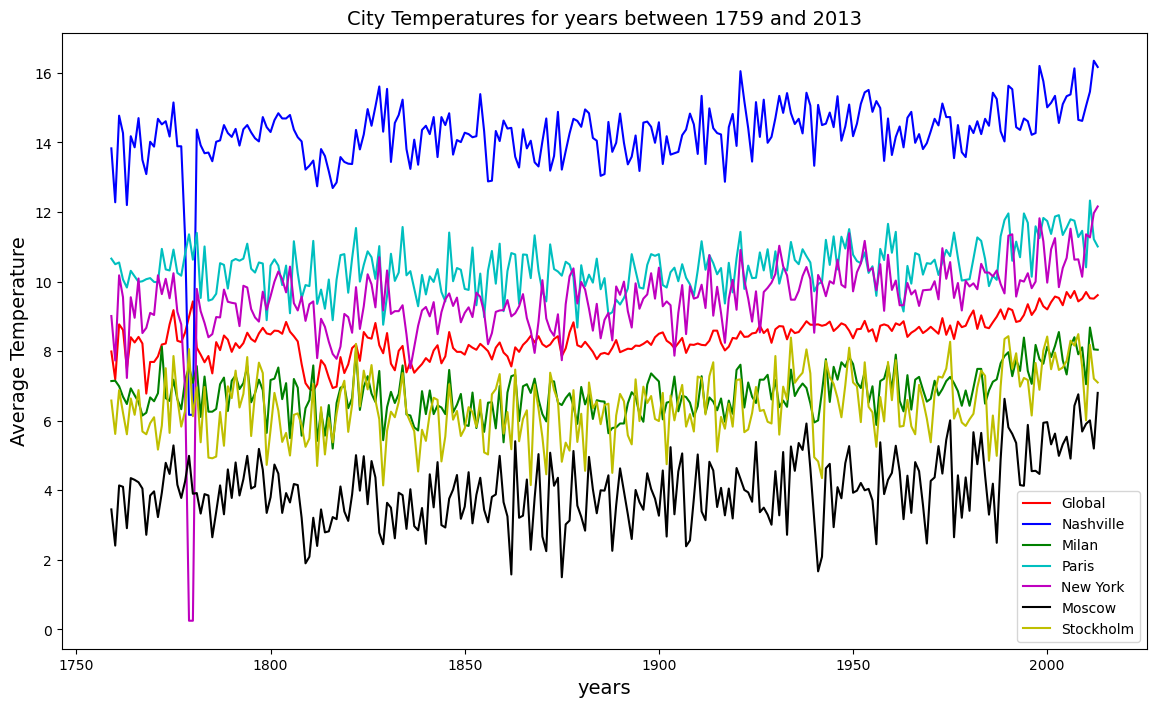

In [9]:
# Draw all the global and city temperatures on the same plot
plt.rcParams["figure.figsize"] = [14,8]

plt.plot(temp_data_wide.index, temp_data_wide["Global"],'r', label="Global")
plt.plot(temp_data_wide.index, temp_data_wide["Nashville"],'b', label="Nashville")
plt.plot(temp_data_wide.index, temp_data_wide["Milan"],'g', label="Milan")
plt.plot(temp_data_wide.index, temp_data_wide["Paris"],'c', label="Paris")
plt.plot(temp_data_wide.index, temp_data_wide["New York"],'m', label="New York")
plt.plot(temp_data_wide.index, temp_data_wide["Moscow"],'k', label="Moscow")
plt.plot(temp_data_wide.index, temp_data_wide["Stockholm"],'y', label="Stockholm")


plt.xlabel('years', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.title('City Temperatures for years between 1759 and 2013', fontsize=14)
plt.rcParams["legend.shadow"]
plt.legend(loc='best')

In [10]:
# Find the correlation matrix
temp_data_wide.corr()

city,Global,Milan,Moscow,Nashville,New York,Paris,Stockholm
city,,,,,,,
Global,1.000000,0.569558,0.622445,0.329276,0.393830,0.519043,0.461624
Milan,0.569558,1.000000,0.520228,0.206932,0.284141,0.902434,0.633498
Moscow,0.622445,0.520228,1.000000,0.230442,0.299764,0.537684,0.782200
Nashville,0.329276,0.206932,0.230442,1.000000,0.907137,0.159702,0.202348
New York,0.393830,0.284141,0.299764,0.907137,1.000000,0.240851,0.255054
Paris,0.519043,0.902434,0.537684,0.159702,0.240851,1.000000,0.717602
Stockholm,0.461624,0.633498,0.782200,0.202348,0.255054,0.717602,1.000000


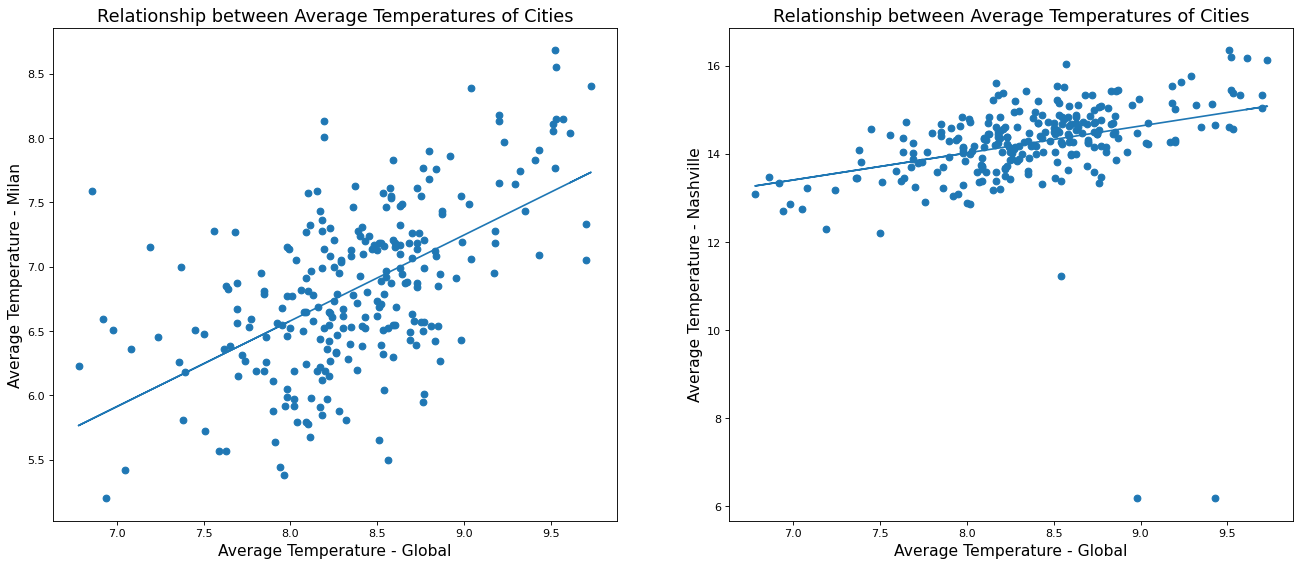

In [17]:
# Draw twp subplots to show the correlations of the cities
x = temp_data_wide.Global
y=  temp_data_wide.Milan
plt.figure(figsize=(20, 8), dpi=80)
plt.subplot(1,2,1)
plt.scatter(x,y);
plt.title('Relationship between Average Temperatures of Cities', fontsize=16);
plt.xlabel ('Average Temperature - Global', fontsize=14)
plt.ylabel ('Average Temperature - Milan', fontsize=14)
m, b = np.polyfit(x, y, 1);  # m = slope, b=intercept
plt.plot(x, m*x + b);  # add line of best fit

plt.subplot(1,2,2)
x = temp_data_wide.Global
y=  temp_data_wide.Nashville
plt.scatter(x,y);
plt.title('Relationship between Average Temperatures of Cities', fontsize=16);
plt.xlabel ('Average Temperature - Global', fontsize=14)
plt.ylabel ('Average Temperature - Nashville', fontsize=14)
m, b = np.polyfit(x, y, 1);  # m = slope, b=intercept
plt.plot(x, m*x + b);  # add line of best fit

### Second part the project, use rolling window caluculations and calculate the correlations again.

In [12]:
# <<your data frame>> = <<your data frame>>.rolling(window=7,min_periods=1).mean()
rolled_data = temp_data_wide.rolling(window=7,min_periods=1).mean()


city,Global,Milan,Moscow,Nashville,New York,Paris,Stockholm
city,,,,,,,
Global,1.000000,0.820653,0.866730,0.535180,0.633141,0.814887,0.748984
Milan,0.820653,1.000000,0.805380,0.417259,0.528897,0.952377,0.810446
Moscow,0.866730,0.805380,1.000000,0.470297,0.554530,0.817926,0.878831
Nashville,0.535180,0.417259,0.470297,1.000000,0.944510,0.403311,0.428162
New York,0.633141,0.528897,0.554530,0.944510,1.000000,0.504301,0.515911
Paris,0.814887,0.952377,0.817926,0.403311,0.504301,1.000000,0.876083
Stockholm,0.748984,0.810446,0.878831,0.428162,0.515911,0.876083,1.000000


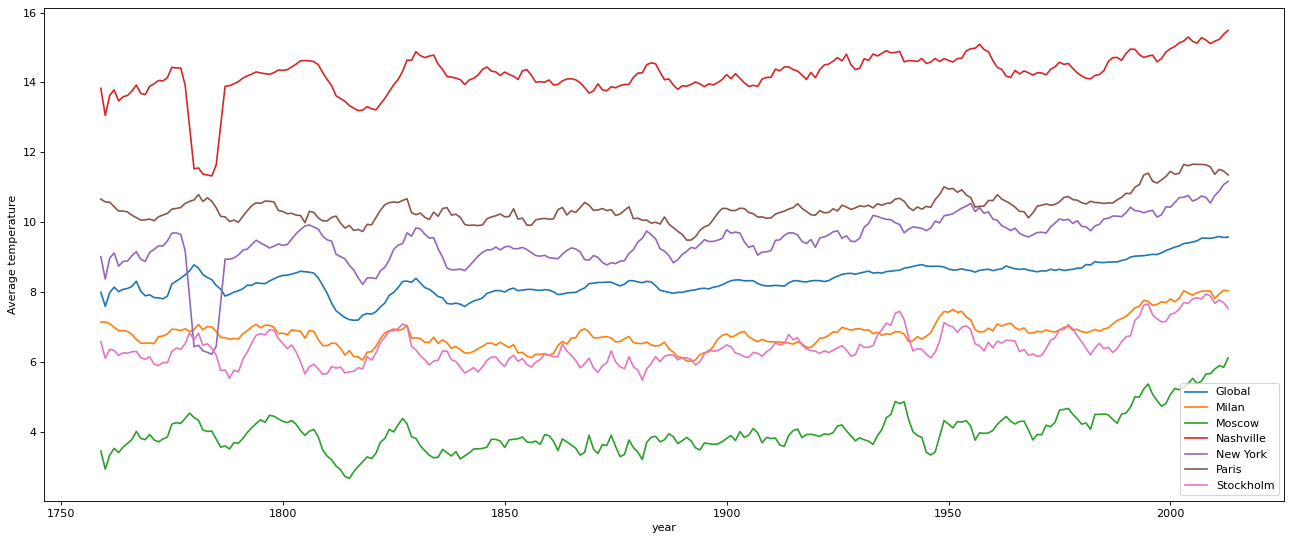

In [32]:
# Draw all the global and city temperatures on the same plot using the rolled data
plt.figure(figsize=(20, 8), dpi=80)
for i,city in enumerate(rolled_data.columns):
    x = rolled_data.index
    y = rolled_data[city]
    plt.plot(x, y, label=city)

plt.ylabel('Average temperature')
plt.xlabel('year')
plt.legend();

In [27]:
# Find the correlation matrix for the rolled data
rolled_data.corr()

city,Global,Milan,Moscow,Nashville,New York,Paris,Stockholm
city,,,,,,,
Global,1.000000,0.820653,0.866730,0.535180,0.633141,0.814887,0.748984
Milan,0.820653,1.000000,0.805380,0.417259,0.528897,0.952377,0.810446
Moscow,0.866730,0.805380,1.000000,0.470297,0.554530,0.817926,0.878831
Nashville,0.535180,0.417259,0.470297,1.000000,0.944510,0.403311,0.428162
New York,0.633141,0.528897,0.554530,0.944510,1.000000,0.504301,0.515911
Paris,0.814887,0.952377,0.817926,0.403311,0.504301,1.000000,0.876083
Stockholm,0.748984,0.810446,0.878831,0.428162,0.515911,0.876083,1.000000


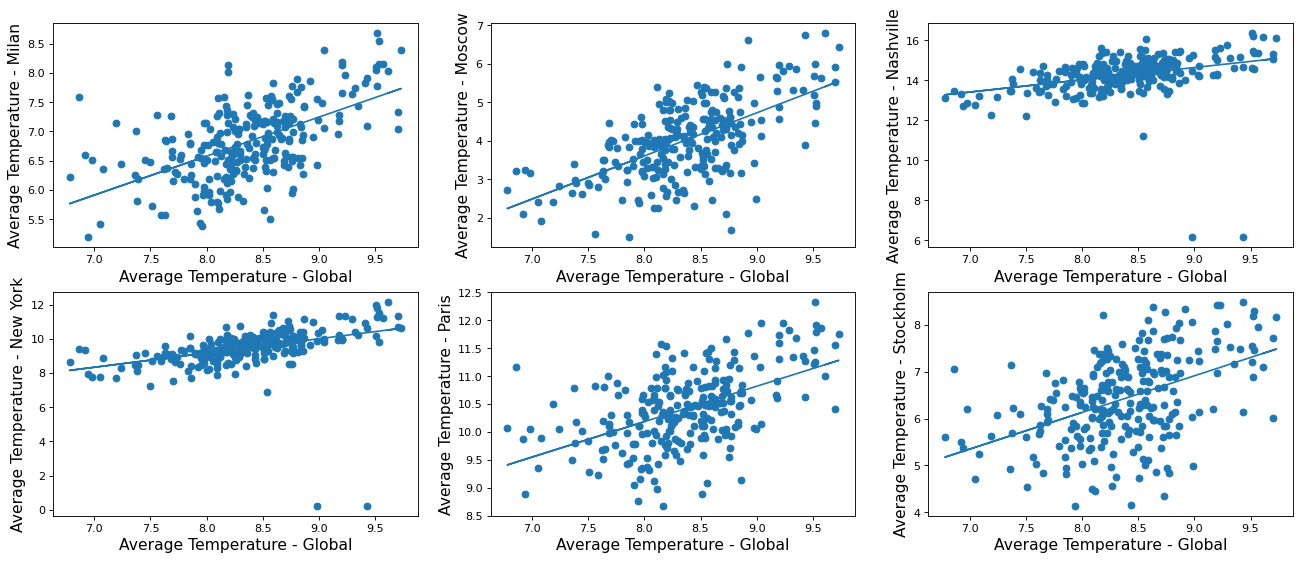

In [28]:
# Draw twp subplots to show the correlations of the cities with global temperature using rolled data
def plot_city_against_global(city_name, plt):
    # Draw twp subplots to show the correlations of the cities
    x = temp_data_wide.Global
    y =  temp_data_wide[city_name]
    plt.scatter(x,y);
    plt.xlabel ('Average Temperature - Global', fontsize=14)
    plt.ylabel (f'Average Temperature - {city_name}', fontsize=14)
    m, b = np.polyfit(x, y, 1);  # m = slope, b=intercept
    plt.plot(x, m*x + b);  # add line of best fit

plt.figure(figsize=(20, 8), dpi=80)
for i,city in enumerate(rolled_data.columns.difference(['Global'])):
    plt.subplot(2,3,i+1)
    plot_city_against_global(city, plt)

### BONUS
Use all the city temps to find the most correlated one with the global. some df operations for missing data and years, some cities they some problems, and the data is huge don't try the heat map to see. Find maxcorrelation from the correlation table.

In [94]:
# This section is only for the graduate students.
# Write a code that finds the city that has the highest correlation with the global temperature using the rolled data

temp_data2 = temp_data.copy(deep=0)
temp_data2['city_country'] = temp_data2.city + ', ' + temp_data2.country
wide_df = temp_data2.pivot_table(index='year', columns='city_country', values='avg_temp')
# wide_df.head()

In [73]:
# temp_data2.city_country.unique()

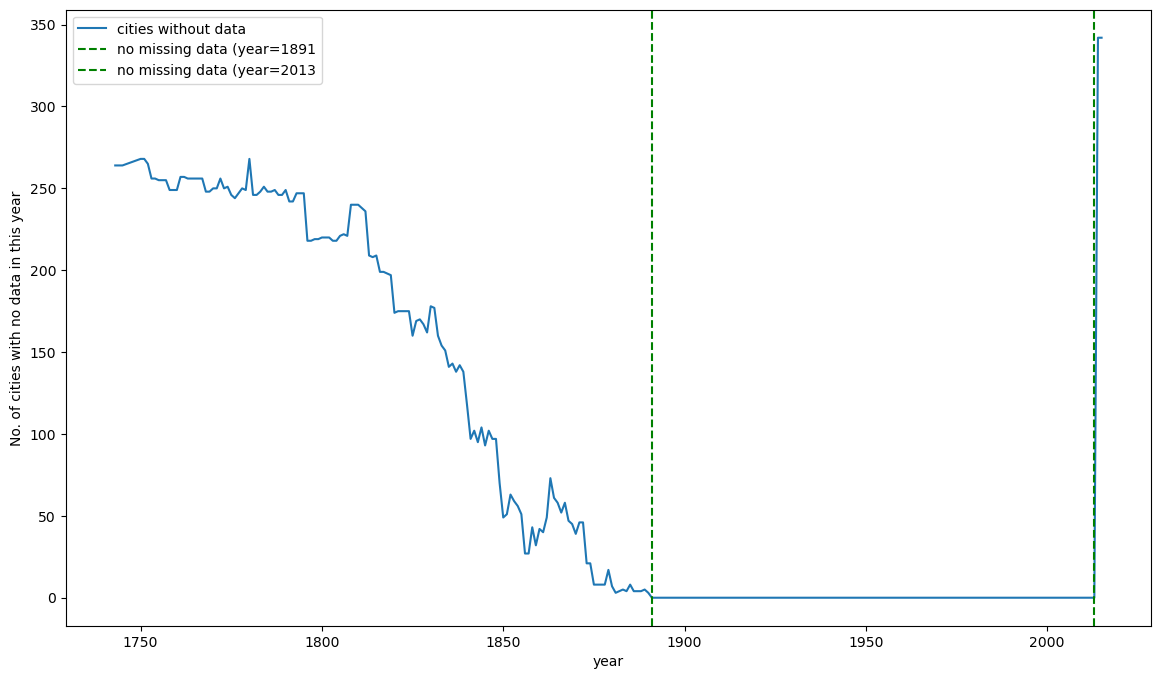

In [74]:
# missing values over years
tmp = wide_df.isna().sum(axis=1)
tmp.plot(label='cities without data')
plt.ylabel('No. of cities with no data in this year')
plt.xlabel('year')
tmp2 = tmp[tmp==0].index
plt.axvline(tmp2.min(), c='g', ls='--', label=f'no missing data (year={tmp2.min()}')
plt.axvline(tmp2.max(), c='g', ls='--', label=f'no missing data (year={tmp2.max()}')
plt.legend();

There is no missing data from 1891 to 2013, we can use data from this range for our analysis instead of handling missing data for other years. For that, we select data with index within this range below.

In [75]:
selected_df = wide_df.loc[tmp2.min():tmp2.max(), :]

In [100]:
corr = selected_df.corr()
# select all rows except index named "Global, Global" because correlation with itself will always be 1. 
# We want the second largest value. Then select 'Global, Global' column and find which index has the max value.
corr_with_global = corr[corr.index != 'Global, Global']['Global, Global']
city, country = corr_with_global.idxmax().split(', ')
print(f'Highest correlation with Global is the city of {city} in the country of {country}.')
print(f'The correlation coefficient is ', corr_with_global.max())

Highest correlation with Global is the city of Georgetown in the country of Guyana.
The correlation coefficient is  0.8911511821283968
